In [15]:
import numpy as np
from sklearn import preprocessing

input_data = np.array(  [[5.1, -2.9, 3.3],
                        [-1.2, 7.8, -6.1],
                        [3.9, 0.4, 2.1],
                        [7.3, -9.9, -4.5]])

# Binarize data
data_binarized = preprocessing.Binarizer(threshold=2.1).transform(input_data)
print("\nBinarized data:\n", data_binarized)

# Print mean and standard deviation
print("\nBEFORE:")
print("Mean =", input_data.mean(axis=0))
print("Std deviation =", input_data.std(axis=0))

# Remove mean
data_scaled = preprocessing.scale(input_data)
print("\nAFTER:")
print("Mean =", data_scaled.mean(axis=0))
print("Std deviation =", data_scaled.std(axis=0))

# Min max scaling
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print("\nMin max scaled data:\n", data_scaled_minmax)

# Normalize data
data_normalized_l1 = preprocessing.normalize(input_data, norm='l1')
data_normalized_l2 = preprocessing.normalize(input_data, norm='l2')
print("\nL1 normalized data:\n", data_normalized_l1)
print("\nL2 normalized data:\n", data_normalized_l2)


Binarized data:
 [[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

BEFORE:
Mean = [ 3.775 -1.15  -1.3  ]
Std deviation = [3.12039661 6.36651396 4.0620192 ]

AFTER:
Mean = [1.11022302e-16 0.00000000e+00 2.77555756e-17]
Std deviation = [1. 1. 1.]

Min max scaled data:
 [[0.74117647 0.39548023 1.        ]
 [0.         1.         0.        ]
 [0.6        0.5819209  0.87234043]
 [1.         0.         0.17021277]]

L1 normalized data:
 [[ 0.45132743 -0.25663717  0.2920354 ]
 [-0.0794702   0.51655629 -0.40397351]
 [ 0.609375    0.0625      0.328125  ]
 [ 0.33640553 -0.4562212  -0.20737327]]

L2 normalized data:
 [[ 0.75765788 -0.43082507  0.49024922]
 [-0.12030718  0.78199664 -0.61156148]
 [ 0.87690281  0.08993875  0.47217844]
 [ 0.55734935 -0.75585734 -0.34357152]]


# **Codage des étiquettes**

In [23]:
import numpy as np
from sklearn import preprocessing

# Sample input labels
input_labels = ['red', 'black', 'red', 'green', 'black', 'yellow', 'white']

# Create label encoder and fit the labels
encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels)

# Print the mapping
print("\nLabel mapping:")
for i, item in enumerate(encoder.classes_):
  print(item, '-->', i)

# Encode a set of labels using the encoder
test_labels = ['green', 'red', 'black']
encoded_values = encoder.transform(test_labels)
print("\nLabels =", test_labels)
print("Encoded values =", list(encoded_values))

# Decode a set of values using the encoder
encoded_values = [3, 0, 4, 1]
decoded_list = encoder.inverse_transform(encoded_values)
print("\nEncoded values =", encoded_values)
print("Decoded labels =", list(decoded_list))


Label mapping:
black --> 0
green --> 1
red --> 2
white --> 3
yellow --> 4

Labels = ['green', 'red', 'black']
Encoded values = [1, 2, 0]

Encoded values = [3, 0, 4, 1]
Decoded labels = ['white', 'black', 'yellow', 'green']


#**Classificateurs de régression logistique**

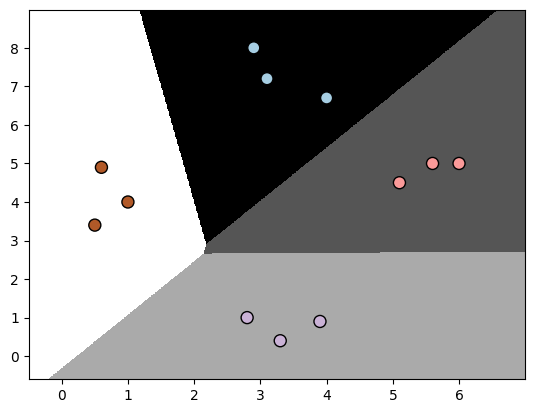

In [46]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


# Define sample input data
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], [5.6, 5], [3.3,
0.4], [3.9, 0.9], [2.8, 1], [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

# Create the logistic regression classifier
classifier = linear_model.LogisticRegression(solver='liblinear', C=10)

# Train the classifier
classifier.fit(X, y)

# Visualize the performance of the classifier
visualize_classifier(classifier, X, y)

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_classifier(classifier, X, y):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Choose a color scheme for the plot
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()



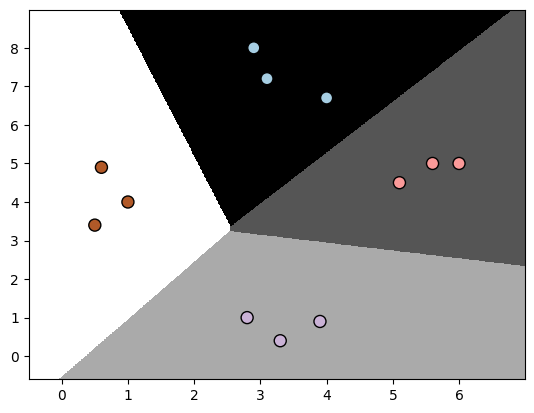

In [44]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt



# Define sample input data
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], [5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1], [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

# Create the logistic regression classifier

classifier = linear_model.LogisticRegression(solver='liblinear', C=100)

# Train the classifier
classifier.fit(X, y)

# Visualize the performance of the classifier
visualize_classifier(classifier, X, y)


In [31]:
!apt-get install -y python3-tk


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-tk is already the newest version (3.10.8-1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


#**Le classificateur Naïve Bayes**

Accuracy of Naïve Bayes classifier = 99.75 %


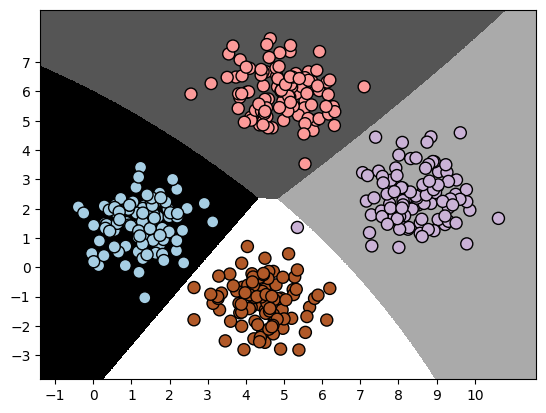

Accuracy of the new classifier = 100.0 %


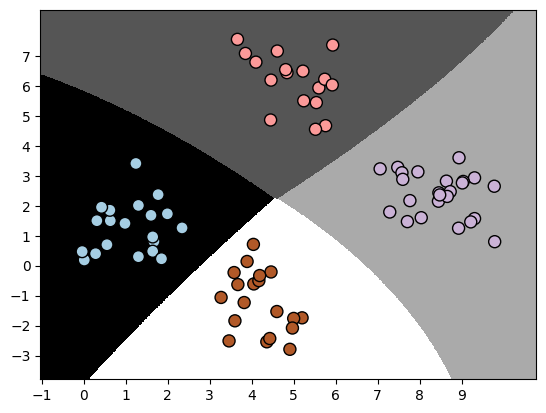

Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Input file containing data

input_file = '/content/drive/My Drive/Colab-Notebooks/lab2-scripts/data_multivar_nb.txt'
# Load data from input file
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]
# Create Naïve Bayes classifier
classifier = GaussianNB()

# Train the classifier
classifier.fit(X, y)

# Predict the values for training data
y_pred = classifier.predict(X)

# Compute accuracy
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Accuracy of Naïve Bayes classifier =", round(accuracy, 2), "%")

# Visualize the performance of the classifier
visualize_classifier(classifier, X, y)

# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)
y_test_pred = classifier_new.predict(X_test)

# compute accuracy of the classifier
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2), "%")

# Visualize the performance of the classifier
visualize_classifier(classifier_new, X_test, y_test)

num_folds = 3
accuracy_values = cross_val_score(classifier,
X, y, scoring='accuracy', cv=num_folds)
print("Accuracy: " + str(round(100*accuracy_values.mean(), 2)) + "%")
precision_values = cross_val_score(classifier,
X, y, scoring='precision_weighted', cv=num_folds)
print("Precision: " + str(round(100*precision_values.mean(), 2)) + "%")
recall_values = cross_val_score(classifier,
X, y, scoring='recall_weighted', cv=num_folds)
print("Recall: " + str(round(100*recall_values.mean(), 2)) + "%")
f1_values = cross_val_score(classifier,
X, y, scoring='f1_weighted', cv=num_folds)
print("F1: " + str(round(100*f1_values.mean(), 2)) + "%")

# **Matrices de confusion**

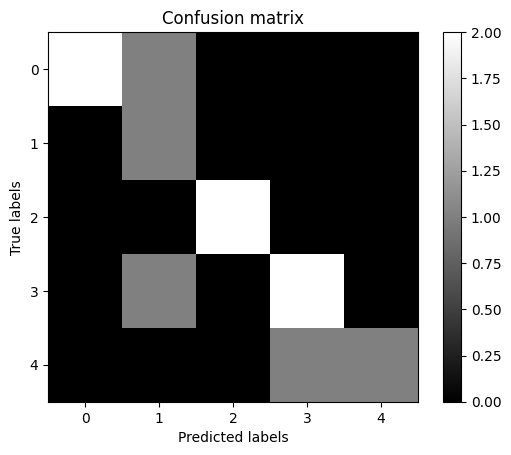


               precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.33      1.00      0.50         1
     Class-2       1.00      1.00      1.00         2
     Class-3       0.67      0.67      0.67         3
     Class-4       1.00      0.50      0.67         2

    accuracy                           0.73        11
   macro avg       0.80      0.77      0.73        11
weighted avg       0.85      0.73      0.75        11



In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Define sample labels
true_labels = [2, 0, 0, 2, 4, 4, 1, 0, 3, 3, 3]
pred_labels = [2, 1, 0, 2, 4, 3, 1, 0, 1, 3, 3]

# Create confusion matrix
confusion_mat = confusion_matrix(true_labels, pred_labels)

# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

# Classification report
targets = ['Class-0', 'Class-1', 'Class-2', 'Class-3', 'Class-4']
print('\n',classification_report(true_labels, pred_labels, target_names=targets))

# **Machines à vecteurs de support**

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split

# Input file containing data
input_file = '/content/drive/My Drive/Colab-Notebooks/lab2-scripts/income_data.txt'

# Read the data
X = []
y = []
count_class1 = 0
count_class2 = 0
max_datapoints = 25000

with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break

        if '?' in line:
            continue

        data = line[:-1].split(', ')

        if data[-1] == '<=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1

        if data[-1] == '>50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1

# Convert to numpy array
X = np.array(X)

# Convert string data to numerical data
label_encoder = []
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):
    if item.isdigit():
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

# Create SVM classifier
classifier = OneVsOneClassifier(LinearSVC(random_state=0))

# Train the classifier
classifier.fit(X, y)

# Cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
classifier = OneVsOneClassifier(LinearSVC(random_state=0))
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

# Compute the F1 score of the SVM classifier
f1 = cross_val_score(classifier, X, y, scoring='f1_weighted', cv=3)
print("F1 score: " + str(round(100*f1.mean(), 2)) + "%")

# Predict output for a test datapoint
input_data = ['37', 'Private', '215646', 'HS-grad', '9', 'Never-married', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', '0', '0', '40', 'United-States']

# Encode test datapoint
input_data_encoded = [-1] * len(input_data)
count = 0
for i, item in enumerate(input_data):
    if item.isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
        input_data_encoded[i] = int(label_encoder[count].transform(input_data[i]))
        count += 1

input_data_encoded = np.array(input_data_encoded)

# Run classifier on encoded datapoint and print output
predicted_class = classifier.predict(input_data_encoded)
print(label_encoder[-1].inverse_transform(predicted_class)[0])

F1 score: 76.09%


ValueError: y should be a 1d array, got an array of shape () instead.

# **Régresseur à une seule variable**

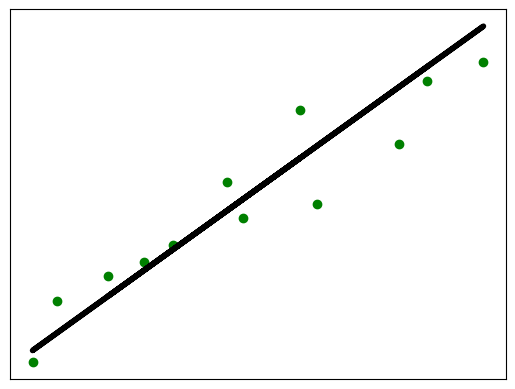

Linear regressor performance:
Mean absolute error = 0.59
Mean squared error = 0.49
Median absolute error = 0.51
Explain variance score = 0.86
R2 score = 0.86

New mean absolute error = 0.59


In [94]:
import pickle

import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

# Input file containing data
input_file = '/content/drive/My Drive/Colab-Notebooks/lab2-scripts/data_singlevar_regr.txt'

# Read data
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Train and test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Training data
X_train, y_train = X[:num_training], y[:num_training]

# Test data
X_test, y_test = X[num_training:], y[num_training:]

# Create linear regressor object
regressor = linear_model.LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Predict the output
y_test_pred = regressor.predict(X_test)

# Plot outputs
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

# Compute performance metrics
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

# Model persistence
output_model_file = 'model.pkl'

# Save the model
with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)

# Load the model
with open(output_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

# Perform prediction on test data
y_test_pred_new = regressor_model.predict(X_test)
print("\nNew mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))

# **Régresseur multivariable**

In [95]:
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
from sklearn.preprocessing import PolynomialFeatures

# Input file containing data
input_file = '/content/drive/My Drive/Colab-Notebooks/lab2-scripts/data_multivar_regr.txt'

# Load the data from the input file
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Split data into training and testing
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Training data
X_train, y_train = X[:num_training], y[:num_training]

# Test data
X_test, y_test = X[num_training:], y[num_training:]

# Create the linear regressor model
linear_regressor = linear_model.LinearRegression()

# Train the model using the training sets
linear_regressor.fit(X_train, y_train)

# Predict the output
y_test_pred = linear_regressor.predict(X_test)

# Measure performance
print("Linear Regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

# Polynomial regression
polynomial = PolynomialFeatures(degree=10)
X_train_transformed = polynomial.fit_transform(X_train)
datapoint = [[7.75, 6.35, 5.56]]
poly_datapoint = polynomial.fit_transform(datapoint)

poly_linear_model = linear_model.LinearRegression()
poly_linear_model.fit(X_train_transformed, y_train)
print("\nLinear regression:\n", linear_regressor.predict(datapoint))
print("\nPolynomial regression:\n", poly_linear_model.predict(poly_datapoint))



Linear Regressor performance:
Mean absolute error = 3.58
Mean squared error = 20.31
Median absolute error = 2.99
Explained variance score = 0.86
R2 score = 0.86

Linear regression:
 [36.05286276]

Polynomial regression:
 [41.08297799]


# **Régresseur vectoriel de soutien**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

# Load Boston housing data from seaborn
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(data_url)

# Prepare the features (X) and target (y)
X = data.drop(columns=["medv"])
y = data["medv"]

# Shuffle the data
X, y = shuffle(X, y, random_state=7)

# Split the data into training and testing datasets
num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create Support Vector Regression model
sv_regressor = SVR(kernel='linear', C=1.0, epsilon=0.1)

# Train Support Vector Regressor
sv_regressor.fit(X_train, y_train)

# Evaluate performance of Support Vector Regressor
y_test_pred = sv_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
evs = explained_variance_score(y_test, y_test_pred)
print("\n#### Performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

# Test the regressor on a test datapoint
test_data = X_test[0]  # Use the first test sample as an example
predicted_price = sv_regressor.predict([test_data])[0]
print("\nPredicted price:", predicted_price)



#### Performance ####
Mean squared error = 15.97
Explained variance score = 0.81

Predicted price: 17.150616019570354
